## Part 1


In [2]:
#Import all the necessary functions

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# a) functions for RK2 and RK4
'''
Input
-----
- f: rate of change, function dy/dt = f(t,y)
- t_i: time at the current point i
- y_i: value of y a the current point i 
- k: step size

Output:
- y_next: estimated value of y at the next point i+1

Notice that this implementation follows a different paradigm
than the one of session 2 (the functions are the main formulas 
and return only the next value of y). 
The intention is to help make it  a little  more clear how 
Euler's method is used inside of the Runge-Kutta methods, 
and how a "better slope" is achieved in all methods that aim 
to improve Euler's.

Your main task is to implement RK4, ideally building upon the 
same structure of the code.
'''

#forward euler method, to implement RK2
def forwardEuler(f, t_i, y_i, dt):
    y_next = y_i + dt*f(t_i, y_i)
    return y_next

#RK2
def rungeKutta2(f, t_i, y_i, dt):
    y_star = forwardEuler(f, t_i, y_i, dt) #calculate the y_star using Euler
    An = f(t_i, y_i)                       #first slope
    Bn = f(t_i + dt, y_star)               #second slope using y_star
    better_slope = (An + Bn) / 2           #take the average to get better slope

    y_next = y_i + dt*better_slope         #calculate y_next using better slope
    return y_next 

#RK4
def rungeKutta4(f, t_i, y_i, k):
    An = f(t_i, y_i)                          #first slope
    Bn = f((t_i + k/2), (y_i + (k*An)/2))     #second slope
    Cn = f(t_i + k/2, y_i + (k*Bn)/2)         #third slope
    Dn = f(t_i + k, y_i + k*Cn)               #fourth slope
    better_slope = (An + 2*Bn + 2*Cn + Dn)/6  #take the weigghted average

    y_next = y_i + k*better_slope             #calculate y_next
    return y_next


In [4]:
# b) Exact solution

def testNumericalMethod(numerical_method, f, y0, interval, dt):
    t = np.arange(interval[0], interval[1], dt)
    y = [y0]

    for i in range(len(t)-1):
        y_next = numerical_method(f, t[i], y[i], dt)
        y.append(y_next) 

    return t, y
  
def test_function(t, y):
    # derivative of y
    return -6*y

y0 = 1 # initial value

def exact_solution(t):
    y = np.exp(-6*t)
    return y

#get the order of the method
def getorder(numerical_method):
    y_exact = exact_solution(1)  #save the exact solution at t=1
    hs = [0.1, 0.05]            #list of timesteps (the 2nd time step is halved)
    y_method = []               #list to save the final calculated ys at t=1
    #loop through the values of h
    for h in hs:
      ys = [1]      #temp list to save calculated ys, starts with initial value
      #loop through all the time steps
      for i in range(1/h):
        #calculate the y using the numerical method
        y = numerical_method(test_function, i*h, ys[-1], h)
        #save the calculated y
        ys.append(y)
      #append the last y value into the list of calculated final ys at t=1
      y_method.append(ys[-1])
    #calculate the ratio between 2 errors
    err_ratio = (y_method[0] - y_exact)/(y_method[1] - y_exact)
    #the order is log base 2 of the ratio
    order = round(np.log2(err_ratio))
    return order


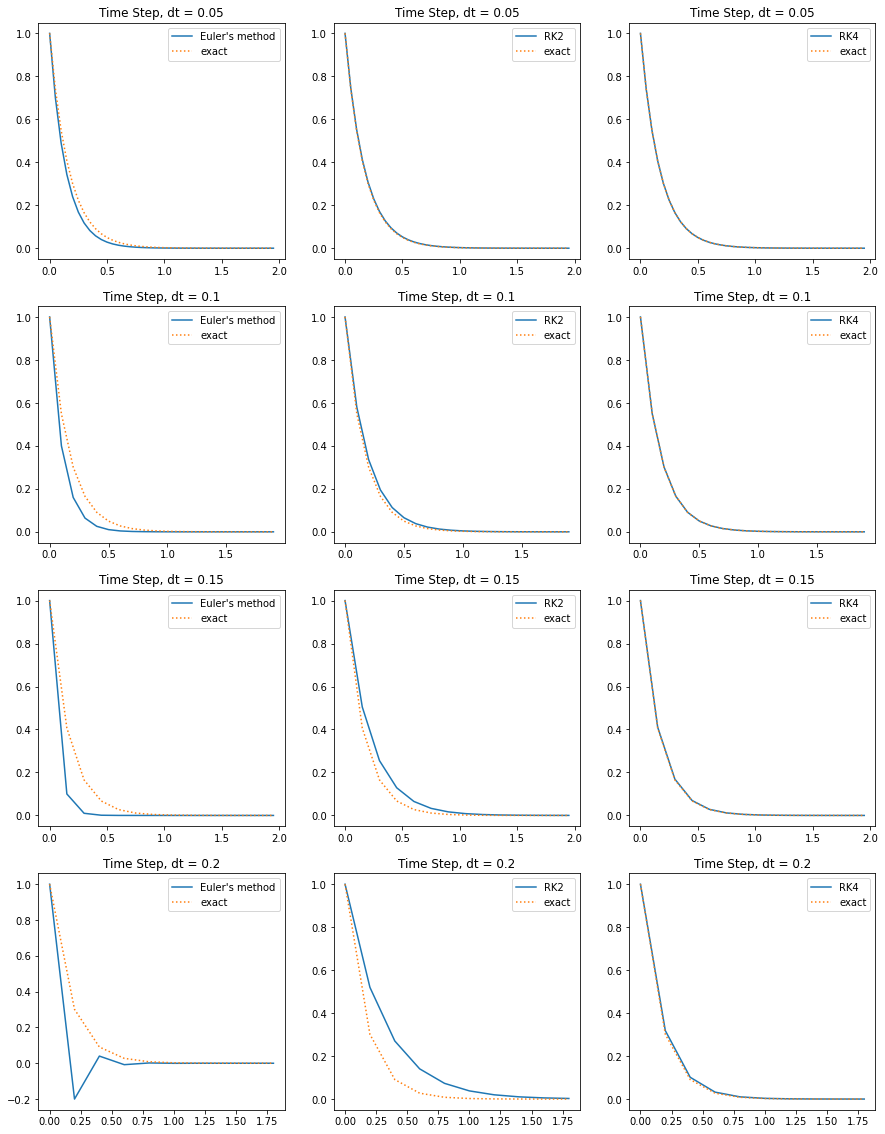

In [5]:
# c) Comparison between methods

interval = (0, 2)
timesteps = [0.05, 0.1, 0.15, 0.2]

plt.figure(figsize = (15, 20))

for i in range(len(timesteps)):
    dt = timesteps[i]
    # Numerical methods
    t_euler, y_euler = testNumericalMethod(forwardEuler, test_function, 
                                           y0, interval, dt)
    t_rk2, y_rk2 = testNumericalMethod(rungeKutta2, test_function, 
                                       y0, interval, dt)
    t_rk4, y_rk4 = testNumericalMethod(rungeKutta4, test_function, 
                                       y0, interval, dt)

    # report results
    t = np.arange(interval[0], interval[1], dt)

    plt.subplot(4,3,3*i + 1)
    plt.plot(t_euler, y_euler, label="Euler\'s method")
    plt.plot(t, exact_solution(t), ':', label = 'exact')
    plt.legend()
    plt.title('Time Step, dt = '+ str(dt))

    plt.subplot(4,3,3*i + 2)
    plt.plot(t_rk2, y_rk2, label="RK2")
    plt.plot(t, exact_solution(t), ':', label = 'exact')
    plt.legend()
    plt.title('Time Step, dt = '+ str(dt))

    plt.subplot(4,3,3*i + 3)
    plt.plot(t_rk4, y_rk4, label="RK4")
    plt.plot(t, exact_solution(t), ':', label = 'exact')
    plt.legend()
    plt.title('Time Step, dt = '+ str(dt))

plt.show()

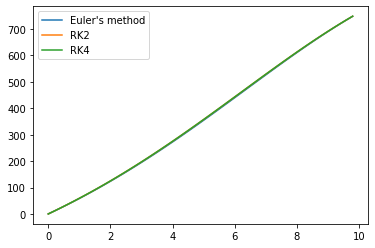

,Time,Euler,RK2,RK4
0,0.0,0.00,0.00,0.00
5,1.0,58.51,59.18,59.18
10,2.0,123.57,124.91,124.92
15,3.0,195.04,197.03,197.03
20,4.0,272.39,274.91,274.92
25,5.0,354.58,357.41,357.42
30,6.0,439.94,442.78,442.80
35,7.0,526.21,528.72,528.75
40,8.0,610.64,612.47,612.51
45,9.0,690.23,691.13,691.19


In [6]:
# d) Rocket Science

# Rocket equation (Vaughen, 2019)

g = 9.8 # Acceleration due to gravity (m/sec^2)
k = 0.3 # Atmospheric drag coefficient(kg/m)
lambda_ = 131.25 # The rate of fuel consumption(kg/sec)
mass_initial = 2480 # Initial mass (kg)
R = 163000 # Rocket's thrust force (Newtons)

# Rate of change of rocket's velocity
def rocket_v_prime(t, v):
    vp1 = (R - (mass_initial - lambda_*t)*g - k*(v**2) + lambda_*v)
	  v_prime = vp1/(mass_initial - lambda_*t)
	  return v_prime

v0 = 0
interval = (0, 10)
dt = 0.2

# Numerical methods
t_euler, y_euler = testNumericalMethod(forwardEuler, rocket_v_prime, 
                                       v0, interval, dt)
t_rk2, y_rk2 = testNumericalMethod(rungeKutta2, rocket_v_prime, 
                                   v0, interval, dt)
t_rk4, y_rk4 = testNumericalMethod(rungeKutta4, rocket_v_prime, 
                                   v0, interval, dt)

# No exact solution this time, too hard to get.
# (That's why we need numerical methods!)

# Report results
plt.plot(t_euler, y_euler, label="Euler\'s method")
plt.plot(t_rk2, y_rk2, label="RK2")
plt.plot(t_rk4, y_rk4, label="RK4")
plt.legend()
plt.show()

# Numerical Values
data = pd.DataFrame({'Time': t_euler,
              'Euler': y_euler,
              'RK2': y_rk2,
              'RK4': y_rk4})
mask = data.Time % 1 == 0 # selecting only the integer times
data[mask].round(2)

## Part 2

a) The analytical solution for 

$x(t) = x_0 cos(\sqrt{\frac{k}{m}}t)$ 

and for 

$v(t) = -x_0 \sqrt{\frac{k}{m}} sin(\sqrt{\frac{k}{m}}t)$


In this, I assume the mass of the block remains constant

b) Update equations using Euler method

$x_{n+1} = x_n + v_n dt$

One assumption for above equation is that the velocity is constant during the time interval dt, which is ofcourse not true. But as the dt approaches 0, this becomes a reasonable assumption.

$v_{n+1} = v_n -\frac{k}{m} x_n dt $

In [7]:
# Simulation of the spring-mass system

class Spring_Mass:

    #initialize all the variables
    def __init__(self, x0, v0, dt, length = 3, mass = 0.25, k = 42, b = 0):

        self.xs = [x0]       #list of positions, starting with initial value
        self.ts = [0]        #list of times, starting with initial value
        self.vs = [v0]       #list of velocities, starting with initial value
        self.states = [np.array((x0, v0))]  #list of states
        self.timestep = dt   #timestep used for simulation
        self.mass = mass     #mass of the block
        self.k = k           #spring constant
        self.springlen = length     #spring length
        self.step = 0        #keep track of step of the system
        self.b = b           #dampening coefficient


    #calculate the derivatives at a certain point to implement RK4
    def derivatives(self, t, states):
        k = self.k
        m = self.mass
        b = self.b
        x_temp = states[0]
        v_temp = states[1]
        #these are the equations for derivatives
        x_prime = v_temp
        v_prime = -(k/m)*x_temp - (b/m)*v_temp 

        #return an array of derivatives
        return np.array((x_prime, v_prime))    
        
    def update_exact(self):
        '''
        write the exact anaytical solution for the given problem 
        as you found in 2.a)
        We will compare our methods with this benchmark
        '''
        #this method will not work when there is a dampening term because
        #then then the solution differs
        tnew = self.ts[-1] + self.timestep
        xnew = self.xs[0]*np.cos(np.sqrt(self.k/self.mass)*tnew)
        vn1 = self.xs[0]*(np.sqrt(self.k/self.mass))
        vnew = -vn1*np.sin(np.sqrt(self.k/self.mass)*tnew)
        self.ts.append[tnew]
        self.xs.append[xnew]
        self.vs.append[vnew]
        self.step += 1
    
    #this acceleration is only for cases without dampening
    def get_acceleration(self):
        acc = -(self.k/self.mass)*self.xs[-1]
        return acc 


    def update_euler(self):
        '''
				update velocity and position using forward Euler's formula
				'''
        k = self.k
        m = self.mass
        b = self.b
        dt = self.timestep
        t_next = self.ts[-1] + dt
        #update equations for Euler
        x_next = self.xs[-1] + self.vs[-1]*dt
        v_next = self.vs[-1] - ((k/m)*self.xs[-1] - (b/m)*self.vs[-1])*dt
        self.ts.append(t_next)
        self.xs.append(x_next)
        self.vs.append(v_next)
        self.step += 1


    def updateRK4(self):
        '''
				update velocity and position using RK4
				'''
        states_next = rungeKutta4(self.derivatives, self.ts[-1], 
                                  self.states[-1], self.timestep)
        self.states.append(states_next)
        self.xs.append(states_next[0])
        self.vs.append(states_next[1])
        self.ts.append(self.ts[-1] + self.timestep)
        self.step += 1
        


    def update_euler_cromer(self):
        '''
				update velocity and position using forward Euler-Cromer's formula
				'''
        t_next = self.ts[-1] + self.timestep
        #update equation for velocity using forward euler
        v_next = self.vs[-1] - (self.k/self.mass)*self.xs[-1]*self.timestep
        #update equation for position using backward euler
        x_next = self.xs[-1] + v_next*self.timestep
        self.ts.append(t_next)
        self.xs.append(x_next)
        self.vs.append(v_next)
        self.step += 1

    def update(self, method = 'Euler'):
        if method == 'Euler':
            self.update_euler()
        elif method == 'RK4':
            self.updateRK4()
        elif method == 'exact':
            self.update_exact()
        else:
            self.update_euler_cromer()


    def display_graph(self):
        '''
        Make a position vs time plot and a velocity vs time plot 
        '''
        plt.figure()
        plt.plot(self.ts, self.vs, color = 'blue', label = 'Velocity vs Time')
        plt.plot(self.ts, self.xs, color = 'green', label = 'Position vs Time')
        plt.xlabel('Time')
        plt.ylabel('Position or Velocity')
        plt.legend()
        plt.show()


    def display(self):
        '''
        display a simple representation of the current system
        You can use this method to get the frames of your animation, if you want
        '''
        current_x = self.xs[-1]  # current position
        
        # plotting the spring as a line
        x = [-3, current_x] 
        y = [0, 0]
        if current_x <= 0:
            plt.plot(x, y, color = 'blue')
        else:
            plt.plot(x, y, color = 'green')

        # plotting the object
        plt.scatter([current_x],[0], s = 1000, color = 'red')

				# showing the rest/equilibrium position
        plt.vlines(0, -2, 2, linestyles='dotted')

        plt.xlim(-3, 5)
        plt.title("Time = "+str(np.round(self.ts[-1], 2)))
        plt.show()

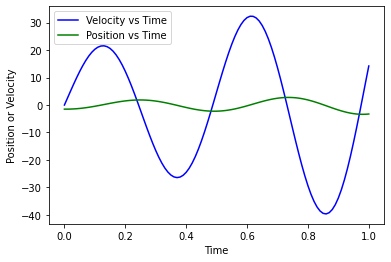

In [10]:
# Test Case
x0 = -1.5
v0 = 0.0
dt = 0.01

spring_mass = Spring_Mass(x0, v0, dt)
#spring_mass.display()


for i in range(100):
    spring_mass.update(method = 'Euler')
    #if i%10 == 0:
    #    spring_mass.display()
spring_mass.display_graph()

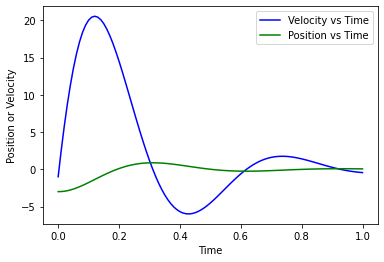

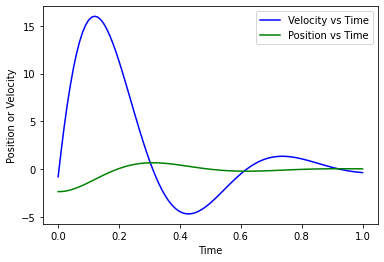

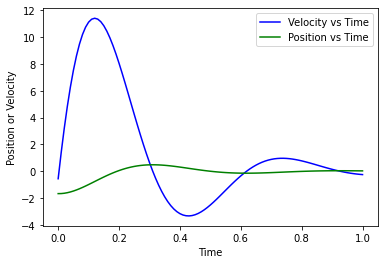

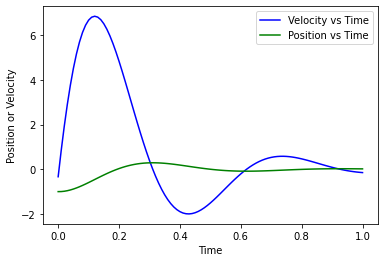

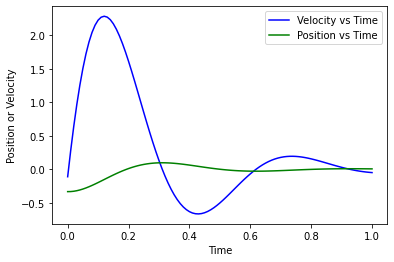

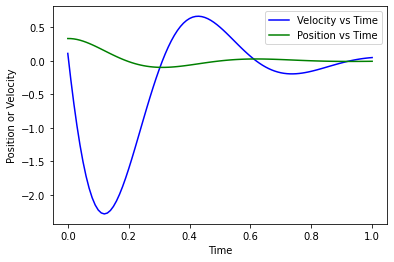

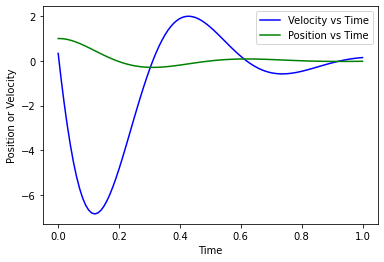

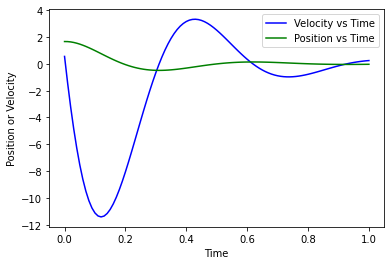

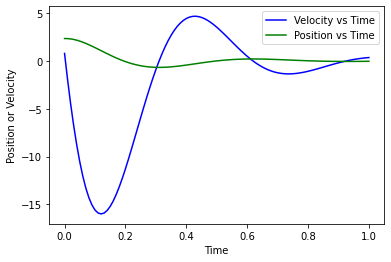

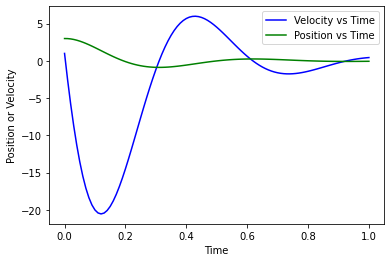

In [21]:
#part 3 of assignment: 3.1

#save the fixed values first
mass = 0.25
k = 30
dt = 0.01

#create a list of initial conditions
xs = np.linspace(-3, 3, 10)
vs = np.linspace(-1, 1, 10)

#let us start with one value of b (first try for b)
b = 2

#run the simulation for above b for the different starting conditions. 
#Based on the result, change the b

for (x, v) in zip(xs, vs):
  spring_mass = Spring_Mass(x, v, dt, mass = mass, k = k, b = b)
  for j in range(100):
    spring_mass.update(method='RK4')
  spring_mass.display_graph()

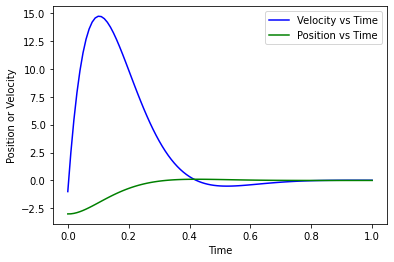

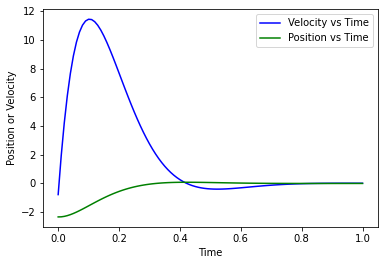

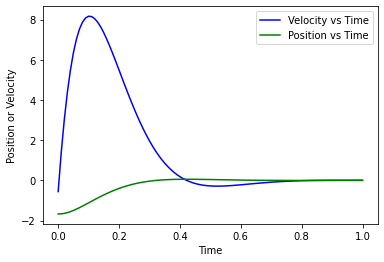

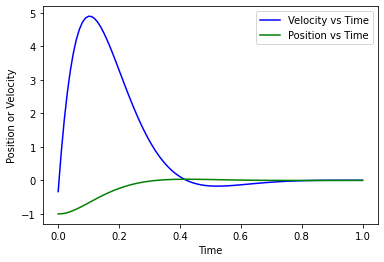

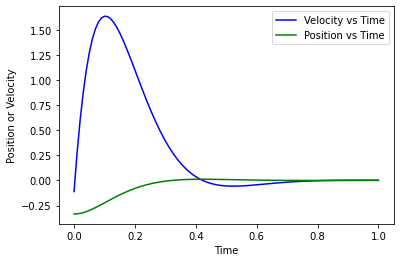

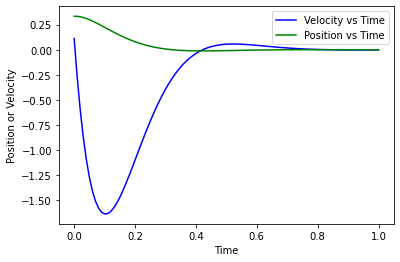

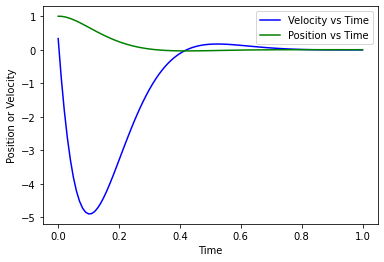

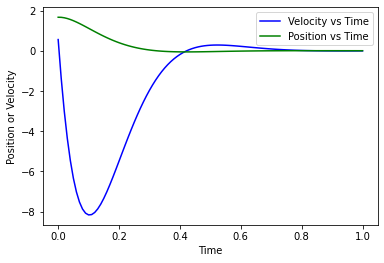

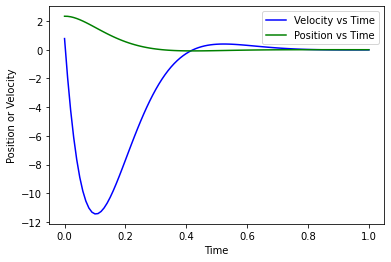

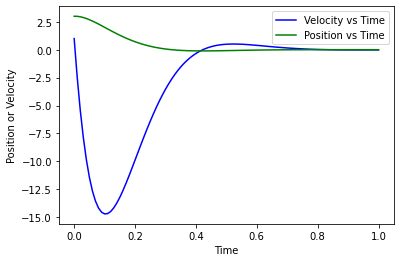

In [34]:
#it seems we need a stronger dampening term since the system is still 
#underdampened. Let us try b=4
b = 4
for (x, v) in zip(xs, vs):
  spring_mass = Spring_Mass(x, v, dt, mass = mass, k = k, b = b)
  for j in range(100):
    spring_mass.update(method='RK4')
  spring_mass.display_graph()

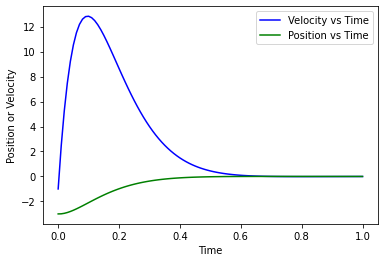

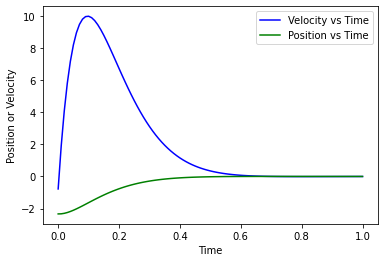

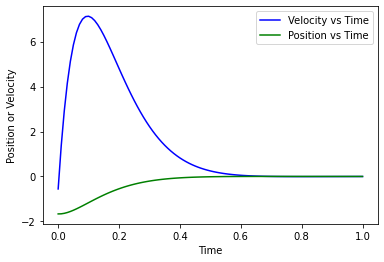

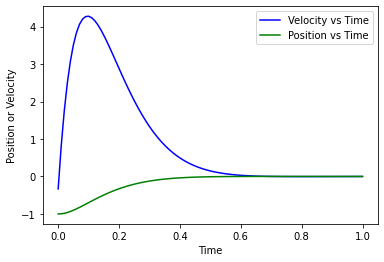

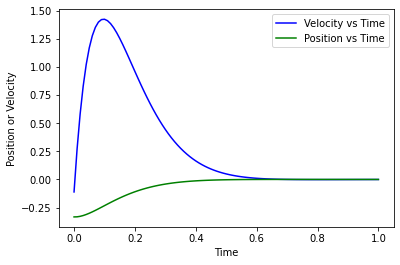

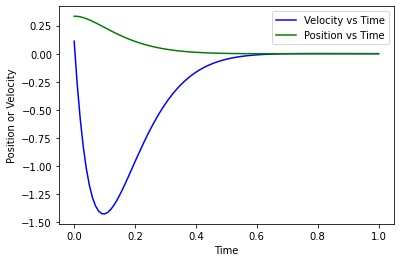

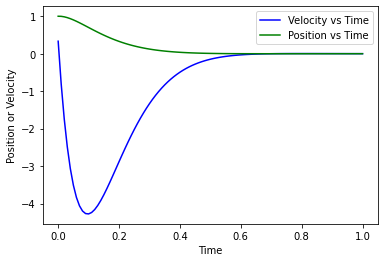

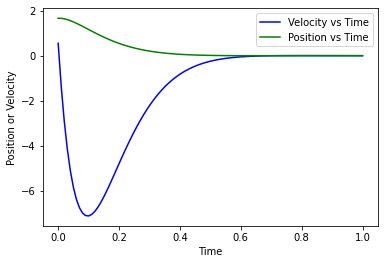

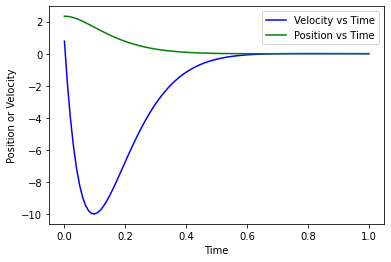

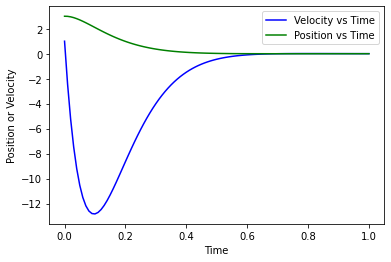

In [39]:
#we still need a teensy bit more dampening to eliminate the oscillation.
#lets try b = 5
b = 5
for (x, v) in zip(xs, vs):
  spring_mass = Spring_Mass(x, v, dt, mass = mass, k = k, b = b)
  for j in range(100):
    spring_mass.update(method='RK4')
  spring_mass.display_graph()

As we see from the above graphs, the system only undergoes half an oscillation for b=5. For anything below b=5, we get a tiny bit of oscillation, but for anything greater than 5, the oscillation period keeps getting longer.

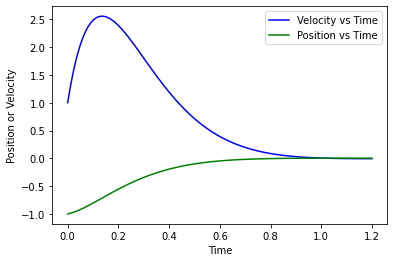

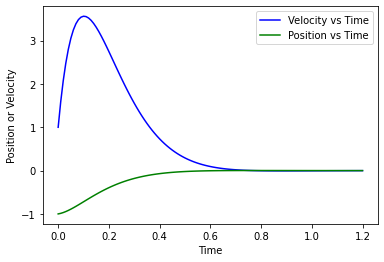

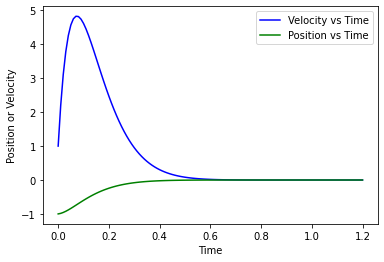

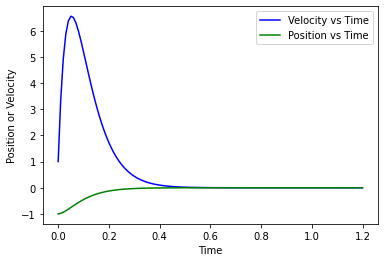

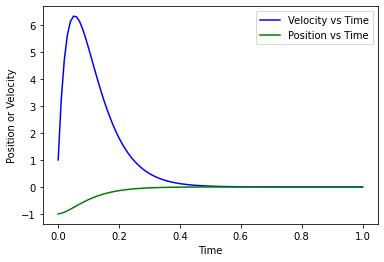

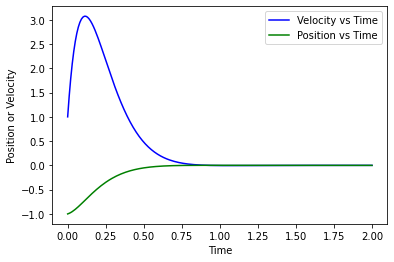

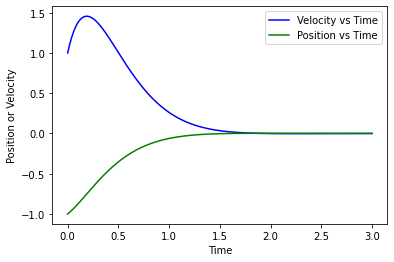

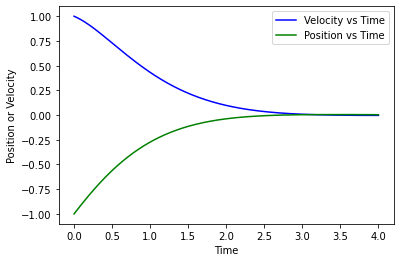

In [86]:
#3.2

ms = [0.1, 0.5, 2.5, 12.5]
ks = [10, 20, 40, 80]

#using trial and error and mid-point algorithm, we find the following critical 
#betas for different values of k
bs_ks = [2.8, 4, 6, 9]

#using trial and error and mid-point algorithm, we find the following critical 
#betas for different values of k
bs_ms = [3.5, 7, 15.5, 34]

ts = [100, 200, 300, 400]

for (ki, bi) in zip(ks, bs_ks):
  spring_mass = Spring_Mass(-1, 1, dt, mass = mass, k = ki, b = bi)
  for j in range(120):
    spring_mass.update(method='RK4')
  spring_mass.display_graph()

for (mi, bi, ti) in zip(ms, bs_ms, ts):
  spring_mass = Spring_Mass(-1, 1, dt, mass = mi, k = k, b = bi)
  for j in range(ti):
    spring_mass.update(method='RK4')
  spring_mass.display_graph()

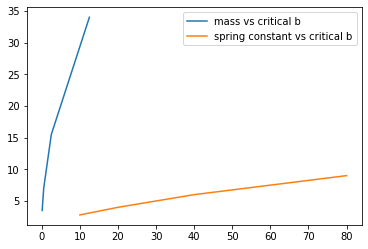

In [91]:
#plot the critical betas vs ks and ms

plt.plot(ms, bs_ms, label = 'mass vs critical b')
plt.plot(ks, bs_ks, label = 'spring constant vs critical b')
plt.legend()

As wee can see from the plots above, the critical beta is directly proportional to both the mass and the spring constant, but the constant of proportionality differs for them. 